<a href="https://colab.research.google.com/github/haroldpc258/COVID-19-Mortality-Prediction-using-Neural-Networks-and-Biomarkers/blob/master/ANN_Proyecto_Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Proyecto, Modelos Computacionales**

Elaborado por:


*   Harold Peña Cuellar
*   Andrés castaño Calderón

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from keras.applications.vgg16 import decode_predictions
#metodologías
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
#Evaluación de metodologías
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
import seaborn as sn; sn.set()
import pylab as pl
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#Regresión
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Path_dataset='/content/drive/MyDrive/Proyecto Modelos/dataset.csv'
database = pd.read_csv(Path_dataset)
database.head(10)

,age,gender,race,death,Time_from_COVID_positive_to_death_in_days,ventilator,albumin,diastolicBP,systolicBP,cr,ddimer,egfr,eosinophil,ferritin,fibrinogen,hgb,inr,lymphocyte,neutrophil,NLratio,platelet,protein,pulse,pulseOx,rr,temperature,wbc,alt,ast,bun,calcium,chloride,crp,interleukin6,ldh,mcv,monocyte,mpv,procalcitonin,rdw,tnf,troponin,ptt,bmi,glucose,direct_bili,total_bili,indirect_bili,creatine_kinase,pro_bnp,potassium,charlson_score,ct_value
0,89+,F,Black,1,0.877083,0,3.9,70,128,2.43,1.63000,22.0,0.0,817.0,NaN,12.6,1.9,4.3,6.8,1.581395,149.0,7.4,106.0,83.0,32.0,98.3,11.7,18.000,0.1999,73.0,8.2,0.1999,0.1999,0.1999,NaN,101.0,0.6,11.6,NaN,14.6,NaN,0.18,33.5,25.64,184.0,0.1999,0.3,0.1001,923.0,NaN,NaN,5,NaN
1,89+,F,Black,1,9.761806,0,3.5,97,124,1.99,NaN,28.0,0.1,NaN,NaN,8.1,NaN,2.2,7.5,3.409091,391.0,6.9,83.0,96.0,18.0,97.6,11.0,12.000,0.4000,32.0,9.1,0.4000,0.4000,0.4000,NaN,99.3,0.9,9.9,NaN,14.3,NaN,0.03,NaN,25.52,230.0,0.4000,1.0,0.6000,121.0,572.0,5.4,6,34.0
2,89+,F,Other,0,NaN,0,3.8,61,126,2.60,0.26999,21.0,0.0,512.0,283.0,13.0,1.2,0.8,7.9,9.875000,84.0,8.1,96.0,100.0,26.0,99.6,9.2,25.000,0.1999,99.0,9.1,0.1999,0.1999,0.1999,386.0,98.6,0.5,14.7,0.3,13.9,NaN,0.03,29.4,15.14,102.0,0.1999,0.5,0.3001,532.0,1363.0,4.7,0,NaN
3,89+,F,Black,0,NaN,0,3.6,56,113,1.40,2.02000,42.0,0.0,367.0,535.0,13.8,1.3,1.7,10.1,5.941176,181.0,7.4,78.0,96.0,20.0,97.5,13.2,9.999,0.2000,65.0,10.7,0.2000,0.2000,0.2000,260.0,103.1,1.0,12.6,NaN,13.7,NaN,0.02,31.2,19.19,206.0,0.2000,0.4,0.2000,100.0,1982.0,4.4,5,NaN
4,89+,M,Other,0,NaN,0,3.7,62,114,1.79,1.99000,43.0,0.0,255.0,NaN,8.4,1.1,0.4,7.8,19.500000,261.0,7.2,79.0,97.0,19.0,97.0,8.8,21.000,0.1999,42.0,8.5,0.1999,0.1999,0.1999,187.0,94.1,0.5,10.0,NaN,16.2,NaN,NaN,43.1,18.78,237.0,0.1999,0.2,0.0001,NaN,NaN,5.4,5,NaN
5,89+,M,Black,0,NaN,0,3.7,63,108,2.56,0.49000,28.0,0.0,689.0,1246.0,15.0,1.2,1.0,11.5,11.500000,407.0,8.5,92.0,95.0,18.0,95.8,13.2,20.000,0.1999,142.0,10.4,0.1999,0.1999,0.1999,363.0,93.4,0.4,12.8,NaN,16.4,NaN,0.05,33.0,NaN,246.0,0.1999,0.4,0.2001,226.0,NaN,5.0,4,NaN
6,89+,F,Other,1,4.333333,0,3.4,0,0,1.20,6.21000,41.0,0.0,491.0,502.0,11.7,2.0,1.7,13.7,8.058824,325.0,7.2,106.0,97.0,20.0,97.5,16.2,21.000,0.1999,34.0,9.7,0.1999,0.1999,0.1999,506.0,88.3,0.6,10.0,0.1,14.0,NaN,0.30,35.8,25.68,NaN,0.1999,0.3,0.1001,NaN,3945.0,3.6,4,NaN
7,89+,F,Black,1,0.573611,0,3.6,68,162,2.74,NaN,19.0,0.1,1717.0,1071.0,15.3,NaN,1.9,9.0,4.736842,120.0,7.2,118.0,96.0,32.0,98.4,11.2,25.000,0.1999,77.0,9.8,0.1999,0.1999,0.1999,NaN,86.9,0.2,13.2,38.2,14.5,NaN,0.08,NaN,27.82,415.0,0.1999,0.3,0.1001,1623.0,NaN,4.7,1,NaN
8,89+,F,Black,0,NaN,0,4.0,78,127,4.90,NaN,10.0,0.0,NaN,NaN,13.1,NaN,1.5,22.3,14.866667,464.0,8.9,95.0,98.0,16.0,98.2,25.6,106.000,0.4000,174.0,10.0,0.4000,0.4000,0.4000,NaN,97.5,1.4,11.8,0.3,13.6,NaN,0.04,NaN,26.47,173.0,0.4000,0.9,0.5000,NaN,NaN,4.7,3,38.2
9,89+,F,Declined,0,NaN,0,NaN,75,145,0.70,NaN,93.0,0.0,NaN,NaN,15.0,NaN,0.6,6.9,11.500000,160.0,NaN,79.0,96.0,16.0,97.5,8.2,NaN,NaN,44.0,8.9,NaN,NaN,NaN,NaN,101.2,0.6,11.6,NaN,14.6,NaN,NaN,NaN,15.74,NaN,NaN,NaN,0.0000,NaN,NaN,4.4,2,NaN


In [ ]:
database.describe()

,death,Time_from_COVID_positive_to_death_in_days,ventilator,albumin,diastolicBP,systolicBP,cr,ddimer,egfr,eosinophil,ferritin,fibrinogen,hgb,inr,lymphocyte,neutrophil,NLratio,platelet,protein,pulse,pulseOx,rr,temperature,wbc,alt,ast,bun,calcium,chloride,crp,interleukin6,ldh,mcv,monocyte,mpv,procalcitonin,rdw,tnf,troponin,ptt,bmi,glucose,direct_bili,total_bili,indirect_bili,creatine_kinase,pro_bnp,potassium,charlson_score,ct_value
count,4313.000000,1087.000000,4313.000000,4009.000000,4313.000000,4313.000000,4134.000000,2746.000000,4133.000000,4265.000000,2405.000000,1991.000000,4265.000000,3770.000000,4265.000000,4265.000000,4265.000000,4265.000000,3994.000000,4279.000000,4277.000000,4279.000000,4276.000000,4265.000000,4004.000000,4093.000000,4134.000000,4240.000000,4093.000000,4093.000000,4093.000000,3212.000000,4265.000000,4265.000000,4161.000000,2113.000000,4263.000000,8.000000,3601.000000,3359.000000,4070.000000,3711.000000,4093.000000,4093.000000,4313.000000,3342.000000,2267.000000,4158.000000,4313.000000,1088.000000
mean,0.252029,8.375917,0.271505,3.723771,67.621609,120.303501,2.036616,3.971679,63.297456,0.037397,1359.094803,621.061276,12.638687,1.231433,1.346542,6.742181,7.873501,234.098945,7.076991,98.907922,92.680150,21.164057,99.196913,8.848535,44.548398,0.295926,32.743825,8.834741,0.295926,0.295926,0.295926,455.105854,89.360680,0.613927,11.045422,2.373675,14.514849,3.680000,0.058511,35.376303,30.403747,187.763678,0.295926,0.600977,0.289491,642.111007,2407.780237,4.424772,2.299328,27.683364
std,0.434228,6.908868,0.594320,0.542227,16.609607,24.686183,2.587585,5.518993,35.680540,0.095618,2958.527580,202.183430,2.317604,0.954479,4.977246,4.174923,8.762052,108.370112,0.770684,20.518351,8.362748,5.818849,1.679213,7.246910,115.339235,0.558640,32.612456,0.752847,0.558640,0.558640,0.558640,359.167905,7.369692,1.102735,1.109417,7.634977,2.153869,1.444269,0.263421,14.682528,48.362443,133.381473,0.558640,0.943887,0.446375,3106.992429,4332.333529,0.738499,2.337212,6.168892
min,0.000000,0.037500,0.000000,1.999900,0.000000,0.000000,0.199990,0.220000,2.000000,0.000000,1.999000,14.999000,2.600000,0.800000,0.100000,0.000000,0.000000,1.000000,2.300000,0.000000,11.000000,0.000000,85.300000,0.200000,6.000000,0.199900,4.999000,2.999900,0.199900,0.199900,0.199900,9.999000,49.000000,0.000000,7.800000,0.099900,10.500000,2.100000,0.009990,19.000000,9.900000,18.000000,0.199900,0.000000,-0.199900,19.999000,59.999000,1.999900,0.000000,12.800000
25%,0.000000,3.147569,0.000000,3.400000,59.000000,108.000000,0.810000,0.860000,33.000000,0.000000,336.000000,488.000000,11.300000,1.000000,0.700000,4.000000,3.416667,164.000000,6.600000,85.000000,91.000000,18.000000,98.200000,5.600000,17.000000,0.199900,13.000000,8.400000,0.199900,0.199900,0.199900,281.000000,85.100000,0.300000,10.300000,0.100000,13.100000,2.575000,0.010000,29.600000,24.632500,114.000000,0.199900,0.300000,0.100100,85.250000,104.000000,4.000000,0.000000,23.075000
50%,0.000000,6.154861,0.000000,3.800000,69.000000,122.000000,1.120000,1.710000,64.000000,0.000000,730.000000,616.000000,12.800000,1.100000,1.000000,5.800000,5.700000,215.000000,7.100000,99.000000,95.000000,20.000000,98.800000,7.600000,27.000000,0.200000,20.000000,8.800000,0.200000,0.200000,0.200000,381.000000,89.600000,0.500000,10.900000,0.200000,14.000000,3.215000,0.010000,32.800000,28.485000,140.000000,0.200000,0.500000,0.200100,169.000000,441.000000,4.300000,2.000000,27.300000
75%,1.000000,12.276042,0.000000,4.100000,79.000000,136.000000,1.920000,3.680000,92.000000,0.000000,1467.000000,743.000000,14.100000,1.200000,1.400000,8.500000,9.500000,280.000000,7.600000,112.000000,98.000000,22.000000,100.000000,10.600000,44.000000,0.300000,40.000000,9.200000,0.300000,0.300000,0.300000,530.250000,93.600000,0.700000,11.800000,0.900000,15.400000,5.105000,0.030000,36.900000,33.197500,207.000000,0.300000,0.700000,0.400000,416.000000,1886.000000,4.800000,4.000000,32.900000
max,1.000000,29.967361,4.000000,5.700000,120.000000,215.000000,31.6600

Edad

In [ ]:
database['age'].unique()

array(['89+', '88', '87', '86', '85', '84', '83', '82', '81', '80', '79',
       '78', '77', '76', '75', '74', '73', '72', '71', '70', '69', '68',
       '67', '66', '65', '64', '63', '62', '61', '60', '59', '58', '57',
       '56', '55', '54', '53', '52', '51', '50', '49', '48', '47', '46',
       '45', '44', '43', '42', '41', '40', '39', '38', '37', '36', '35',
       '34', '33', '32', '31', '30', '29', '28', '27', '26', '25', '24',
       '23', '22', '21', '20', '19', '18'], dtype=object)

In [ ]:
database['age'].value_counts()

89+    202
77     123
65     113
71     113
60     110
      ... 
20      11
21      10
23      10
19       9
18       3
Name: age, Length: 72, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


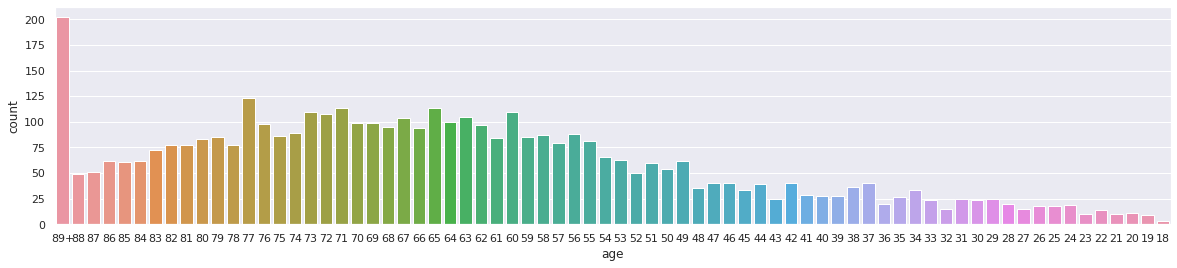

In [ ]:
plt.figure(figsize=(20, 4))
sn.countplot(database['age'], label='Count')
plt.show()

Raza

In [ ]:
database['race'].unique()

array(['Black', 'Other', 'Declined', 'White', 'Asian',
       'Native_American_Alaskan', 'Other_Pacific_Islander'], dtype=object)

In [ ]:
database['race'].value_counts()

Other                      1785
Black                      1560
White                       428
Declined                    418
Asian                       113
Native_American_Alaskan       5
Other_Pacific_Islander        4
Name: race, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


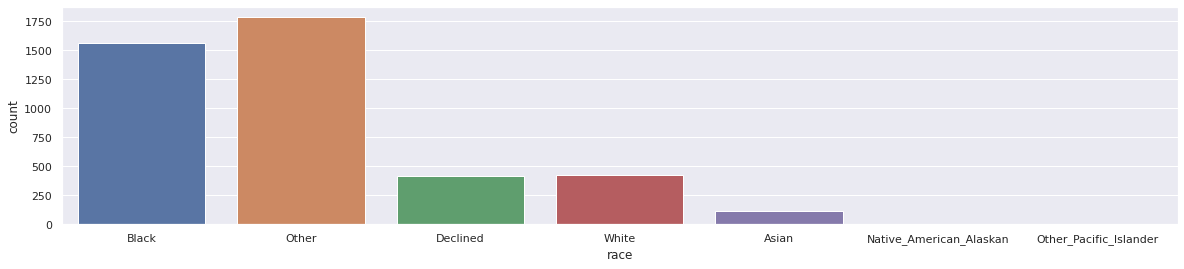

In [ ]:
plt.figure(figsize=(20, 4))
sn.countplot(database['race'], label='Count')
plt.show()

Género

In [ ]:
database['gender'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
database['gender'].value_counts()

M    2289
F    2024
Name: gender, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


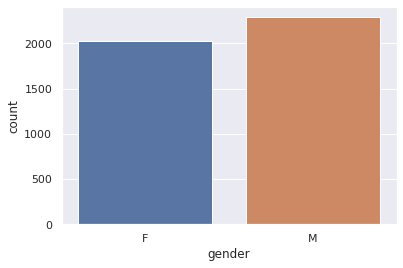

In [ ]:
sn.countplot(database['gender'], label='Count')
plt.show()

Tipo de Ventilador

In [ ]:
database['ventilator'].unique()

array([0, 2, 1, 4])

In [ ]:
database['ventilator'].value_counts()

0    3468
1     525
2     317
4       3
Name: ventilator, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


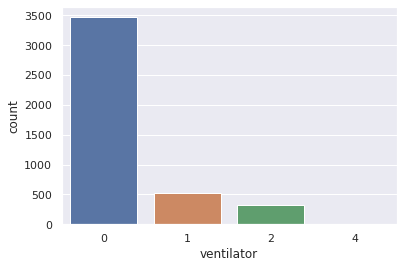

In [ ]:
sn.countplot(database['ventilator'], label='Count')
plt.show()

Muerte

In [ ]:
database['death'].unique()

array([1, 0])

In [ ]:
database['death'].value_counts()

0    3226
1    1087
Name: death, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


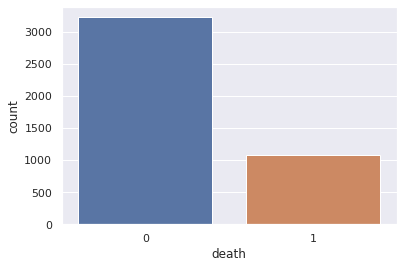

In [ ]:
sn.countplot(database['death'], label='Count')
plt.show()

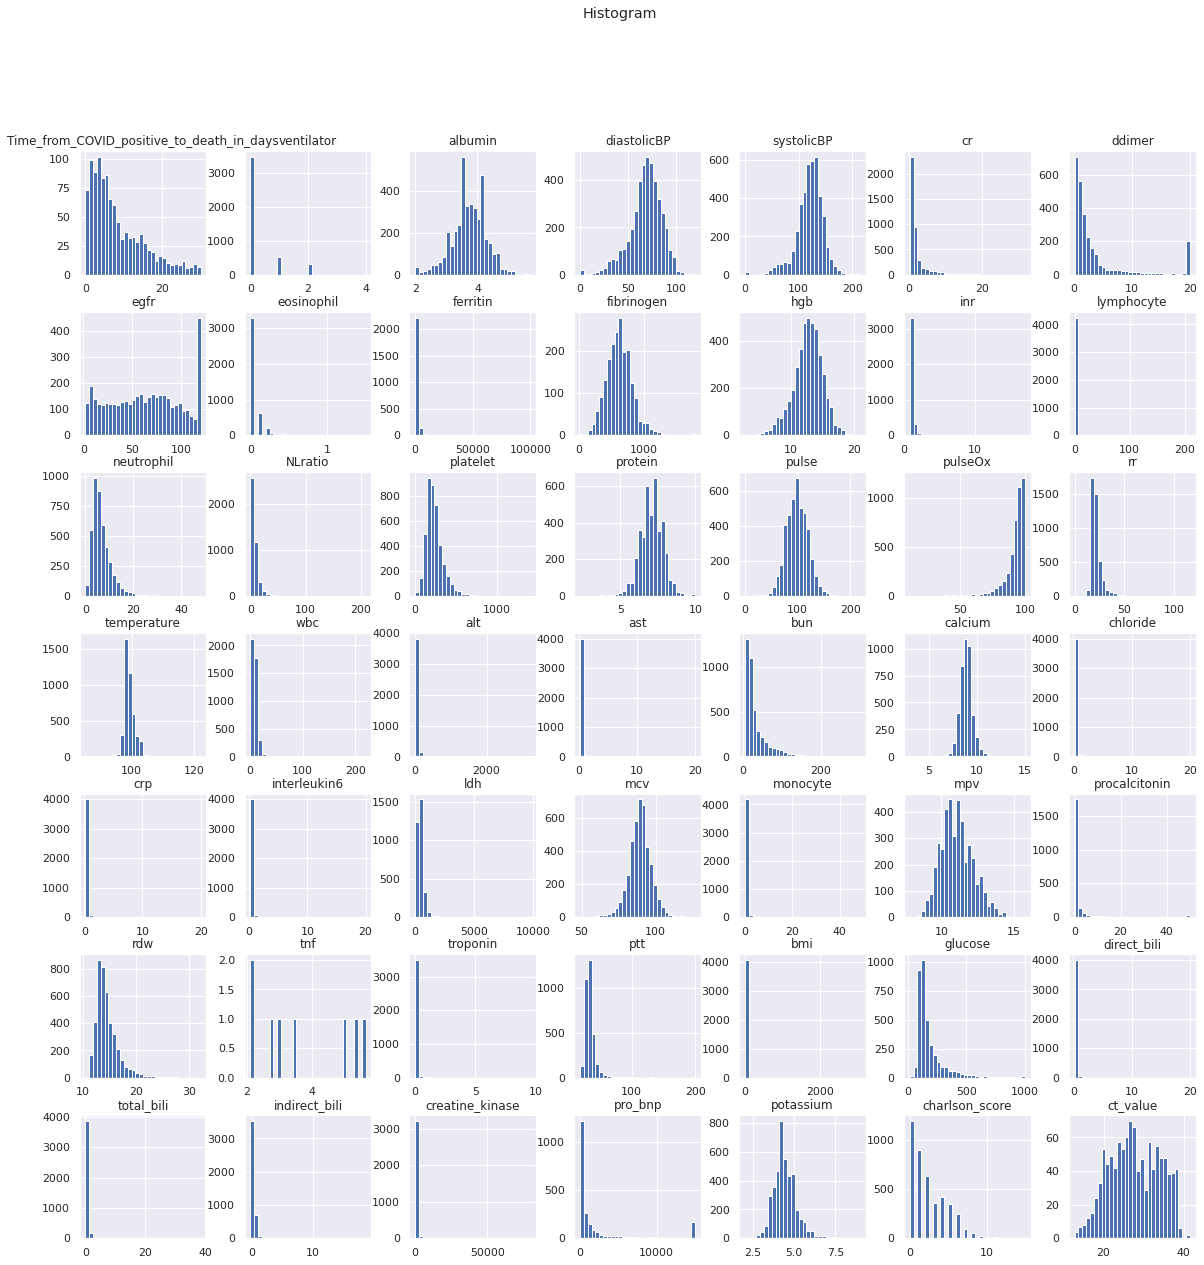

In [ ]:
database.drop('death', axis=1).hist(bins=30, figsize=(20, 20))
pl.suptitle('Histogram')
plt.show()

In [ ]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4313 entries, 0 to 4312
Data columns (total 53 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   age                                        4313 non-null   object 
 1   gender                                     4313 non-null   object 
 2   race                                       4313 non-null   object 
 3   death                                      4313 non-null   int64  
 4   Time_from_COVID_positive_to_death_in_days  1087 non-null   float64
 5   ventilator                                 4313 non-null   int64  
 6   albumin                                    4009 non-null   float64
 7   diastolicBP                                4313 non-null   int64  
 8   systolicBP                                 4313 non-null   int64  
 9   cr                                         4134 non-null   float64
 10  ddimer                  

# **Preprocesamiento**

In [ ]:
df = database.copy()
df.drop(['Time_from_COVID_positive_to_death_in_days', 'ddimer', 'ferritin', 'fibrinogen', 'ldh', 'inr', 'procalcitonin', 'tnf', 'troponin',
         'ptt', 'creatine_kinase', 'pro_bnp', 'ct_value'], axis=1, inplace=True) #Eliminamos las características con menos del 85% de datos no nulos.
df.head(10)

,age,gender,race,death,ventilator,albumin,diastolicBP,systolicBP,cr,egfr,eosinophil,hgb,lymphocyte,neutrophil,NLratio,platelet,protein,pulse,pulseOx,rr,temperature,wbc,alt,ast,bun,calcium,chloride,crp,interleukin6,mcv,monocyte,mpv,rdw,bmi,glucose,direct_bili,total_bili,indirect_bili,potassium,charlson_score
0,89+,F,Black,1,0,3.9,70,128,2.43,22.0,0.0,12.6,4.3,6.8,1.581395,149.0,7.4,106.0,83.0,32.0,98.3,11.7,18.000,0.1999,73.0,8.2,0.1999,0.1999,0.1999,101.0,0.6,11.6,14.6,25.64,184.0,0.1999,0.3,0.1001,NaN,5
1,89+,F,Black,1,0,3.5,97,124,1.99,28.0,0.1,8.1,2.2,7.5,3.409091,391.0,6.9,83.0,96.0,18.0,97.6,11.0,12.000,0.4000,32.0,9.1,0.4000,0.4000,0.4000,99.3,0.9,9.9,14.3,25.52,230.0,0.4000,1.0,0.6000,5.4,6
2,89+,F,Other,0,0,3.8,61,126,2.60,21.0,0.0,13.0,0.8,7.9,9.875000,84.0,8.1,96.0,100.0,26.0,99.6,9.2,25.000,0.1999,99.0,9.1,0.1999,0.1999,0.1999,98.6,0.5,14.7,13.9,15.14,102.0,0.1999,0.5,0.3001,4.7,0
3,89+,F,Black,0,0,3.6,56,113,1.40,42.0,0.0,13.8,1.7,10.1,5.941176,181.0,7.4,78.0,96.0,20.0,97.5,13.2,9.999,0.2000,65.0,10.7,0.2000,0.2000,0.2000,103.1,1.0,12.6,13.7,19.19,206.0,0.2000,0.4,0.2000,4.4,5
4,89+,M,Other,0,0,3.7,62,114,1.79,43.0,0.0,8.4,0.4,7.8,19.500000,261.0,7.2,79.0,97.0,19.0,97.0,8.8,21.000,0.1999,42.0,8.5,0.1999,0.1999,0.1999,94.1,0.5,10.0,16.2,18.78,237.0,0.1999,0.2,0.0001,5.4,5
5,89+,M,Black,0,0,3.7,63,108,2.56,28.0,0.0,15.0,1.0,11.5,11.500000,407.0,8.5,92.0,95.0,18.0,95.8,13.2,20.000,0.1999,142.0,10.4,0.1999,0.1999,0.1999,93.4,0.4,12.8,16.4,NaN,246.0,0.1999,0.4,0.2001,5.0,4
6,89+,F,Other,1,0,3.4,0,0,1.20,41.0,0.0,11.7,1.7,13.7,8.058824,325.0,7.2,106.0,97.0,20.0,97.5,16.2,21.000,0.1999,34.0,9.7,0.1999,0.1999,0.1999,88.3,0.6,10.0,14.0,25.68,NaN,0.1999,0.3,0.1001,3.6,4
7,89+,F,Black,1,0,3.6,68,162,2.74,19.0,0.1,15.3,1.9,9.0,4.736842,120.0,7.2,118.0,96.0,32.0,98.4,11.2,25.000,0.1999,77.0,9.8,0.1999,0.1999,0.1999,86.9,0.2,13.2,14.5,27.82,415.0,0.1999,0.3,0.1001,4.7,1
8,89+,F,Black,0,0,4.0,78,127,4.90,10.0,0.0,13.1,1.5,22.3,14.866667,464.0,8.9,95.0,98.0,16.0,98.2,25.6,106.000,0.4000,174.0,10.0,0.4000,0.4000,0.4000,97.5,1.4,11.8,13.6,26.47,173.0,0.4000,0.9,0.5000,4.7,3
9,89+,F,Declined,0,0,NaN,75,145,0.70,93.0,0.0,15.0,0.6,6.9,11.500000,160.0,NaN,79.0,96.0,16.0,97.5,8.2,NaN,NaN,44.0,8.9,NaN,NaN,NaN,101.2,0.6,11.6,14.6,15.74,NaN,NaN,NaN,0.0000,4.4,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4313 entries, 0 to 4312
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4313 non-null   object 
 1   gender          4313 non-null   object 
 2   race            4313 non-null   object 
 3   death           4313 non-null   int64  
 4   ventilator      4313 non-null   int64  
 5   albumin         4009 non-null   float64
 6   diastolicBP     4313 non-null   int64  
 7   systolicBP      4313 non-null   int64  
 8   cr              4134 non-null   float64
 9   egfr            4133 non-null   float64
 10  eosinophil      4265 non-null   float64
 11  hgb             4265 non-null   float64
 12  lymphocyte      4265 non-null   float64
 13  neutrophil      4265 non-null   float64
 14  NLratio         4265 non-null   float64
 15  platelet        4265 non-null   float64
 16  protein         3994 non-null   float64
 17  pulse           4279 non-null   f

In [ ]:
#Reemplazamos los valores NaN por la media de cada caraterística
df['albumin'].fillna(df['albumin'].mean(), inplace=True)
df['cr'].fillna(df['cr'].mean(), inplace=True)
df['egfr'].fillna(df['egfr'].mean(), inplace=True)
df['eosinophil'].fillna(df['eosinophil'].mean(), inplace=True)
df['hgb'].fillna(df['hgb'].mean(), inplace=True)
df['lymphocyte'].fillna(df['lymphocyte'].mean(), inplace=True)
df['neutrophil'].fillna(df['neutrophil'].mean(), inplace=True)
df['NLratio'].fillna(df['NLratio'].mean(), inplace=True)
df['platelet'].fillna(df['platelet'].mean(), inplace=True)
df['protein'].fillna(df['protein'].mean(), inplace=True)
df['pulse'].fillna(df['pulse'].mean(), inplace=True)
df['pulseOx'].fillna(df['pulseOx'].mean(), inplace=True)
df['rr'].fillna(df['rr'].mean(), inplace=True)
df['temperature'].fillna(df['temperature'].mean(), inplace=True)
df['wbc'].fillna(df['wbc'].mean(), inplace=True)
df['alt'].fillna(df['alt'].mean(), inplace=True)
df['ast'].fillna(df['ast'].mean(), inplace=True)
df['bun'].fillna(df['bun'].mean(), inplace=True)
df['calcium'].fillna(df['calcium'].mean(), inplace=True)
df['chloride'].fillna(df['chloride'].mean(), inplace=True)
df['crp'].fillna(df['crp'].mean(), inplace=True)
df['interleukin6'].fillna(df['interleukin6'].mean(), inplace=True)
df['mcv'].fillna(df['mcv'].mean(), inplace=True)
df['monocyte'].fillna(df['monocyte'].mean(), inplace=True)
df['mpv'].fillna(df['mpv'].mean(), inplace=True)
df['rdw'].fillna(df['rdw'].mean(), inplace=True)
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
df['glucose'].fillna(df['glucose'].mean(), inplace=True)
df['direct_bili'].fillna(df['direct_bili'].mean(), inplace=True)
df['total_bili'].fillna(df['total_bili'].mean(), inplace=True)
df['potassium'].fillna(df['potassium'].mean(), inplace=True)
df.isna().sum()

age               0
gender            0
race              0
death             0
ventilator        0
albumin           0
diastolicBP       0
systolicBP        0
cr                0
egfr              0
eosinophil        0
hgb               0
lymphocyte        0
neutrophil        0
NLratio           0
platelet          0
protein           0
pulse             0
pulseOx           0
rr                0
temperature       0
wbc               0
alt               0
ast               0
bun               0
calcium           0
chloride          0
crp               0
interleukin6      0
mcv               0
monocyte          0
mpv               0
rdw               0
bmi               0
glucose           0
direct_bili       0
total_bili        0
indirect_bili     0
potassium         0
charlson_score    0
dtype: int64

In [ ]:
df.dtypes

age                object
gender             object
race               object
death               int64
ventilator          int64
albumin           float64
diastolicBP         int64
systolicBP          int64
cr                float64
egfr              float64
eosinophil        float64
hgb               float64
lymphocyte        float64
neutrophil        float64
NLratio           float64
platelet          float64
protein           float64
pulse             float64
pulseOx           float64
rr                float64
temperature       float64
wbc               float64
alt               float64
ast               float64
bun               float64
calcium           float64
chloride          float64
crp               float64
interleukin6      float64
mcv               float64
monocyte          float64
mpv               float64
rdw               float64
bmi               float64
glucose           float64
direct_bili       float64
total_bili        float64
indirect_bili     float64
potassium   

In [ ]:
#Convertimos características tipo Object a númericas
df_object = df.select_dtypes(include="O")
df_number = df.select_dtypes(exclude="O")
label = LabelEncoder()
df_object = df_object.astype(str).apply(label.fit_transform)

df = pd.concat([df_object, df_number], axis = 1)
df.head(10)

,age,gender,race,death,ventilator,albumin,diastolicBP,systolicBP,cr,egfr,eosinophil,hgb,lymphocyte,neutrophil,NLratio,platelet,protein,pulse,pulseOx,rr,temperature,wbc,alt,ast,bun,calcium,chloride,crp,interleukin6,mcv,monocyte,mpv,rdw,bmi,glucose,direct_bili,total_bili,indirect_bili,potassium,charlson_score
0,71,0,1,1,0,3.900000,70,128,2.43,22.0,0.0,12.6,4.3,6.8,1.581395,149.0,7.400000,106.0,83.0,32.0,98.3,11.7,18.000000,0.199900,73.0,8.2,0.199900,0.199900,0.199900,101.0,0.6,11.6,14.6,25.640000,184.000000,0.199900,0.300000,0.1001,4.424772,5
1,71,0,1,1,0,3.500000,97,124,1.99,28.0,0.1,8.1,2.2,7.5,3.409091,391.0,6.900000,83.0,96.0,18.0,97.6,11.0,12.000000,0.400000,32.0,9.1,0.400000,0.400000,0.400000,99.3,0.9,9.9,14.3,25.520000,230.000000,0.400000,1.000000,0.6000,5.400000,6
2,71,0,4,0,0,3.800000,61,126,2.60,21.0,0.0,13.0,0.8,7.9,9.875000,84.0,8.100000,96.0,100.0,26.0,99.6,9.2,25.000000,0.199900,99.0,9.1,0.199900,0.199900,0.199900,98.6,0.5,14.7,13.9,15.140000,102.000000,0.199900,0.500000,0.3001,4.700000,0
3,71,0,1,0,0,3.600000,56,113,1.40,42.0,0.0,13.8,1.7,10.1,5.941176,181.0,7.400000,78.0,96.0,20.0,97.5,13.2,9.999000,0.200000,65.0,10.7,0.200000,0.200000,0.200000,103.1,1.0,12.6,13.7,19.190000,206.000000,0.200000,0.400000,0.2000,4.400000,5
4,71,1,4,0,0,3.700000,62,114,1.79,43.0,0.0,8.4,0.4,7.8,19.500000,261.0,7.200000,79.0,97.0,19.0,97.0,8.8,21.000000,0.199900,42.0,8.5,0.199900,0.199900,0.199900,94.1,0.5,10.0,16.2,18.780000,237.000000,0.199900,0.200000,0.0001,5.400000,5
5,71,1,1,0,0,3.700000,63,108,2.56,28.0,0.0,15.0,1.0,11.5,11.500000,407.0,8.500000,92.0,95.0,18.0,95.8,13.2,20.000000,0.199900,142.0,10.4,0.199900,0.199900,0.199900,93.4,0.4,12.8,16.4,30.403747,246.000000,0.199900,0.400000,0.2001,5.000000,4
6,71,0,4,1,0,3.400000,0,0,1.20,41.0,0.0,11.7,1.7,13.7,8.058824,325.0,7.200000,106.0,97.0,20.0,97.5,16.2,21.000000,0.199900,34.0,9.7,0.199900,0.199900,0.199900,88.3,0.6,10.0,14.0,25.680000,187.763678,0.199900,0.300000,0.1001,3.600000,4
7,71,0,1,1,0,3.600000,68,162,2.74,19.0,0.1,15.3,1.9,9.0,4.736842,120.0,7.200000,118.0,96.0,32.0,98.4,11.2,25.000000,0.199900,77.0,9.8,0.199900,0.199900,0.199900,86.9,0.2,13.2,14.5,27.820000,415.000000,0.199900,0.300000,0.1001,4.700000,1
8,71,0,1,0,0,4.000000,78,127,4.90,10.0,0.0,13.1,1.5,22.3,14.866667,464.0,8.900000,95.0,98.0,16.0,98.2,25.6,106.000000,0.400000,174.0,10.0,0.400000,0.400000,0.400000,97.5,1.4,11.8,13.6,26.470000,173.000000,0.400000,0.900000,0.5000,4.700000,3
9,71,0,2,0,0,3.723771,75,145,0.70,93.0,0.0,15.0,0.6,6.9,11.500000,160.0,7.076991,79.0,96.0,16.0,97.5,8.2,44.548398,0.295926,44.0,8.9,0.295926,0.295926,0.295926,101.2,0.6,11.6,14.6,15.740000,187.763678,0.295926,0.600977,0.0000,4.400000,2


In [ ]:
df.dtypes
# Ejemplo: En la característica 'age' existian valores 89+ los cuales pasaron a estar etiquetados como '71'.
# También, en la característica 'gender' los valores para 'F' y 'M' pasaron a ser 0 y 1 respectivamente.

age                 int64
gender              int64
race                int64
death               int64
ventilator          int64
albumin           float64
diastolicBP         int64
systolicBP          int64
cr                float64
egfr              float64
eosinophil        float64
hgb               float64
lymphocyte        float64
neutrophil        float64
NLratio           float64
platelet          float64
protein           float64
pulse             float64
pulseOx           float64
rr                float64
temperature       float64
wbc               float64
alt               float64
ast               float64
bun               float64
calcium           float64
chloride          float64
crp               float64
interleukin6      float64
mcv               float64
monocyte          float64
mpv               float64
rdw               float64
bmi               float64
glucose           float64
direct_bili       float64
total_bili        float64
indirect_bili     float64
potassium   

In [ ]:
# Se selecciónan las caracteísticas y etiquetas
X = df.drop(['death'], axis = 1)
y = df.death

# **Aplicación de PCA**

Base de datos original.

In [ ]:
# Se Aplica PCA
PCA = PCA(n_components=0.85)
PCA.fit(X)
X_pca = PCA.transform(X)

print('Tamaño Original: {}'.format(str(X.shape)))
print('Tamaño Reducido: {}'.format(str(X_pca.shape)))
print('Componentes Resultantes:', X_pca.shape[1])

Tamaño Original: (4313, 39)
Tamaño Reducido: (4313, 3)
Componentes Resultantes: 3


In [ ]:
pd.DataFrame(X_pca)

,0,1,2
0,-22.997918,-8.153058,-86.520989
1,83.880312,-59.547992,128.464383
2,-118.139021,7.405653,-125.161367
3,5.165132,-21.516255,-63.649314
4,55.491296,-25.068610,6.069249
...,...,...,...
4308,-19.900504,122.437765,-34.785919
4309,-1.833926,-27.767338,3.763219
4310,-65.605859,20.581477,9.714505
4311,409.349111,-24.650739,-46.950386


Base de datos escalada.

In [ ]:
# Se escalan los datos
ss = StandardScaler(copy=True, with_mean=True, with_std=True)
X_scaled = ss.fit_transform(X)

In [ ]:
# Se aplica PCA a los datos escalados
PCA.fit(X_scaled)
X_pca_scaled = PCA.transform(X_scaled)

print('Tamaño Original: {}'.format(str(X_scaled.shape)))
print('Tamaño Reducido: {}'.format(str(X_pca_scaled.shape)))
print('Componentes Resultantes:', X_pca_scaled.shape[1])

Tamaño Original: (4313, 39)
Tamaño Reducido: (4313, 20)
Componentes Resultantes: 20


In [ ]:
# Database post PCA escalado
pd.DataFrame(X_pca_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.315957,-2.112144,-0.327631,0.024305,-0.871659,1.275942,0.714715,0.537355,0.515255,-0.515257,2.475708,0.555837,-0.672495,0.427346,-0.795801,0.364836,-0.490759,0.382289,-0.101226,0.880113
1,0.838414,-1.480677,-1.389392,2.101858,1.750196,-0.476551,-0.154615,-0.384013,-0.368883,-0.501701,2.027395,-0.458117,-0.146203,-0.086264,-1.207989,0.125614,1.529577,0.088213,0.561662,-0.150107
2,-0.106383,-1.790872,-0.779943,0.843725,-2.008541,1.819093,0.553842,-0.695283,2.542833,-0.207614,0.202211,1.794940,-0.507140,-0.615778,0.176498,-0.334010,-1.623070,0.236130,0.238066,-0.428956
3,-0.192536,-1.873364,-0.409709,1.799518,-0.991291,1.627864,-1.058279,-1.512017,2.198480,-0.968911,0.955500,0.349197,-0.168337,0.217936,-0.550284,0.767493,0.504942,0.562047,0.252384,0.240591
4,-0.274159,-2.320394,-0.995234,0.372163,1.032038,-0.676326,-0.626659,-1.360342,-0.150287,0.969993,-0.105747,-0.810049,-0.079481,0.693371,-0.003945,-0.947271,0.826915,-0.118005,0.951756,-0.255286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4308,-1.065649,2.846963,1.014733,-0.787142,-1.602230,0.241764,0.032483,1.084506,-1.134130,0.662954,-1.783265,0.820000,0.276090,-1.013393,0.205066,-1.020776,0.277168,0.207990,-0.419728,0.563161
4309,-1.074766,2.135255,-0.078417,-0.590279,2.307893,-0.403524,-0.987027,-0.572668,-0.616666,-0.921171,-1.097335,0.455463,0.499838,-1.622286,-0.535707,0.243695,-0.468638,-0.852525,0.339806,0.503911
4310,-0.965460,2.913196,2.340966,2.723364,-3.017624,0.073036,-1.446883,0.461979,0.387860,-0.289772,-2.391160,1.168069,-0.154563,-1.159976,0.898787,1.209159,-0.064910,-0.217959,0.030651,0.231304
4311,-0.940614,1.912434,1.365184,2.521164,-2.437393,-0.871620,-0.586520,1.131113,0.447878,-2.396181,-1.635998,-1.162361,0.645973,-1.268291,-1.059908,-0.023256,-0.156673,-0.617125,-0.324654,1.489199


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.3, random_state=2)
X_train_pca, X_test_pca, y_train_pca, y_test_pca =  train_test_split(X_pca, y, test_size=0.3, random_state=2)
X_train_pca_scaled, X_test_pca_scaled, y_train_pca_scaled, y_test_pca_scaled = train_test_split(X_pca_scaled, y, test_size=0.3, random_state=2)


In [ ]:
X_dev_pca_scaled, X_test_pca_scaled, y_dev_pca_scaled, y_test_pca_scaled = train_test_split(X_test_pca_scaled, y_test_pca_scaled, test_size=0.5, random_state=2)
X_dev_scaled, X_test_scaled, y_dev_scaled, y_test_scaled = train_test_split(X_test_scaled, y_test_scaled, test_size=0.5, random_state=2)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
X_train_pca_scaled.shape

(3019, 20)

In [ ]:
X_test_pca_scaled.shape

(647, 20)

In [ ]:
X_dev_pca_scaled.shape

(647, 20)

In [ ]:
np.unique(y_train)

array([0, 1])

In [ ]:
inputs = tf.keras.layers.Input(shape=(20,))

Layer = tf.keras.layers.Dense(274, activation='relu')(inputs)
Layer = tf.keras.layers.Dense(173, activation='relu')(Layer)
Layer = tf.keras.layers.Dense(112, activation='relu')(Layer)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(Layer)

ann = tf.keras.models.Model(inputs=inputs, outputs=outputs)

In [ ]:
ann.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense_12 (Dense)            (None, 274)               5754      
                                                                 
 dense_13 (Dense)            (None, 173)               47575     
                                                                 
 dense_14 (Dense)            (None, 112)               19488     
                                                                 
 dense_15 (Dense)            (None, 1)                 113       
                                                                 
Total params: 72,930
Trainable params: 72,930
Non-trainable params: 0
_________________________________________________________________


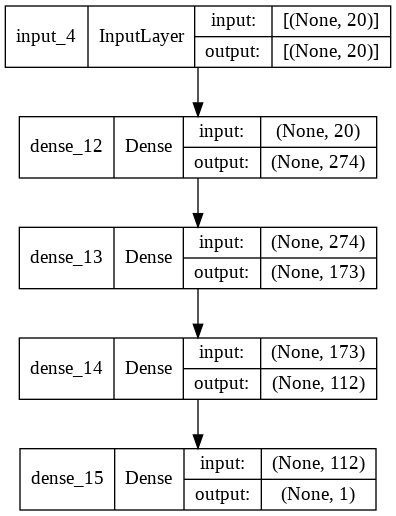

In [ ]:
tf.keras.utils.plot_model(ann, show_shapes=True)

In [ ]:
# Compilamos el modelo, definiendo la función de coste y el optimizador.
ann.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=0.05), metrics=['accuracy'])

# Y entrenamos al modelo. Los callbacks
history = ann.fit(X_train_pca_scaled, y_train_pca_scaled, epochs=100, validation_data=(X_dev_pca_scaled,y_dev_pca_scaled))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
95/95 [==============================] - 1s 6ms/step - loss: 0.1628 - accuracy: 0.7867 - val_loss: 0.1216 - val_accuracy: 0.8578
Epoch 2/100
95/95 [==============================] - 0s 4ms/step - loss: 0.1131 - accuracy: 0.8582 - val_loss: 0.1070 - val_accuracy: 0.8563
Epoch 3/100
95/95 [==============================] - 0s 5ms/step - loss: 0.1044 - accuracy: 0.8652 - val_loss: 0.1025 - val_accuracy: 0.8609
Epoch 4/100
95/95 [==============================] - 0s 5ms/step - loss: 0.1009 - accuracy: 0.8688 - val_loss: 0.1009 - val_accuracy: 0.8594
Epoch 5/100
95/95 [==============================] - 0s 4ms/step - loss: 0.0986 - accuracy: 0.8711 - val_loss: 0.0989 - val_accuracy: 0.8594
Epoch 6/100
95/95 [==============================] - 0s 4ms/step - loss: 0.0969 - accuracy: 0.8738 - val_loss: 0.0987 - val_accuracy: 0.8655
Epoch 7/100
95/95 [==============================] - 0s 4ms/step - loss: 0.0949 - accuracy: 0.8755 - val_loss: 0.0982 - val_accuracy: 0.8702
Epoch 8/100
9

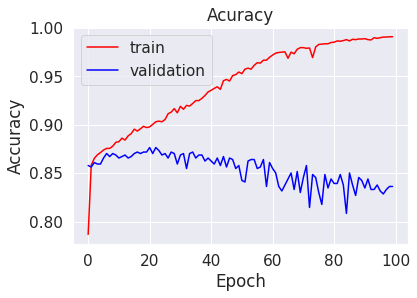

In [ ]:
plt.plot(history.history['accuracy'], label='train', color="red")
plt.plot(history.history['val_accuracy'], label='validation', color="blue")
plt.title('Acuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

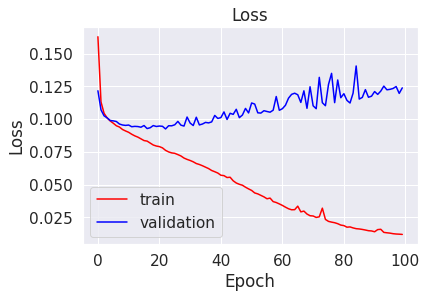

In [ ]:
plt.plot(history.history['loss'], label='train', color="red")
plt.plot(history.history['val_loss'], label='validation', color="blue")
plt.title('Loss')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [ ]:
predictions = ann.predict(X_test_pca_scaled)
predictions

array([[1.18865967e-06],
       [4.99857664e-02],
       [1.87459134e-03],
       [5.75877726e-03],
       [1.80565968e-01],
       [9.99761760e-01],
       [4.10793000e-05],
       [1.11983745e-05],
       [9.99262154e-01],
       [2.53236271e-04],
       [4.44968864e-02],
       [1.85920820e-01],
       [4.63649780e-01],
       [4.79915380e-01],
       [9.68552172e-01],
       [1.22739049e-02],
       [9.92764890e-01],
       [4.44126874e-03],
       [9.58793700e-01],
       [1.06288813e-01],
       [9.93912067e-07],
       [3.31894007e-05],
       [8.51470113e-01],
       [2.71099448e-01],
       [1.95403114e-01],
       [5.33036327e-05],
       [3.32311465e-05],
       [1.51625276e-01],
       [9.97468710e-01],
       [9.85206187e-01],
       [9.20864381e-03],
       [4.06674683e-01],
       [5.70793152e-02],
       [2.18284149e-02],
       [4.12788168e-08],
       [9.99612749e-01],
       [8.22766796e-02],
       [2.33825718e-04],
       [1.08495267e-04],
       [1.45072088e-01],


In [ ]:
predictions = np.around(predictions)

In [ ]:
def metrics(pred, ytest):

  print('Accuracy:', accuracy_score(ytest, predictions))
  print('F1 score:', f1_score(ytest, predictions,average='weighted'))
  print('Recall:', recall_score(ytest, predictions,average='weighted'))
  print('Precision:', precision_score(ytest, predictions, average='weighted'))
  print('\n clasification report:\n', classification_report(ytest, predictions))
  print('\n confusion matrix:\n',confusion_matrix(ytest, predictions))


  #Creating confussion matrix
  snn_cm = confusion_matrix(ytest, predictions)

  # Plotting cofusion matrix
  snn_df_cm = pd.DataFrame(snn_cm, range(2), range(2))
  plt.figure(figsize = (10,7))
  sn.set(font_scale=1.4)
  sn.heatmap(snn_df_cm, annot=True, annot_kws={"size": 12}, fmt="d")
  plt.ylabel('True class')
  plt.xlabel('Predicted class')
  plt.show()


Accuracy: 0.8330757341576507
F1 score: 0.8341822148340644
Recall: 0.8330757341576507
Precision: 0.8354540805113752

 clasification report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       495
           1       0.64      0.66      0.65       152

    accuracy                           0.83       647
   macro avg       0.77      0.77      0.77       647
weighted avg       0.84      0.83      0.83       647


 confusion matrix:
 [[438  57]
 [ 51 101]]


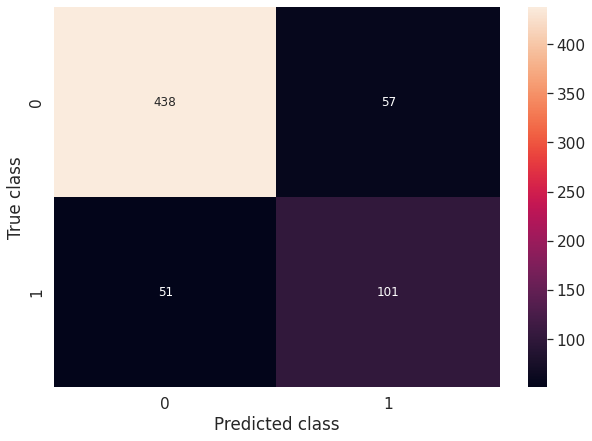

In [ ]:
metrics(predictions, y_test_pca_scaled)

In [ ]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(random_state = 0)
ann.fit(X_train_pca_scaled, y_train_pca_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(random_state=0)

In [ ]:
ann.score(X_train_pca_scaled, y_train_pca_scaled)

0.9304405432262338

In [ ]:
ann.score(X_test_pca_scaled, y_test_pca_scaled)

0.8423493044822257

In [ ]:
predictions = ann.predict(X_test_scaled)
predictions

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

Accuracy: 0.8330757341576507
F1 score: 0.8341822148340644
Recall: 0.8330757341576507
Precision: 0.8354540805113752

 clasification report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       495
           1       0.64      0.66      0.65       152

    accuracy                           0.83       647
   macro avg       0.77      0.77      0.77       647
weighted avg       0.84      0.83      0.83       647


 confusion matrix:
 [[438  57]
 [ 51 101]]


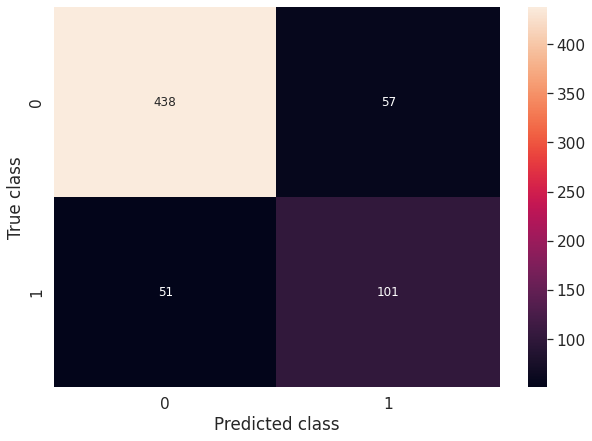

In [ ]:
metrics(predictions, y_test_pca_scaled)